# 第 7 章：数据类型

In [1]:
# 导入tip数据集
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')
print(tips.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [2]:
# 把sex变量转换为字符串对象类型（str）
tips['sex_str'] = tips['sex'].astype(str)
print(tips.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


In [3]:
# astype 示例
tips['total_bill'] = tips['total_bill'].astype(str)
print(tips.dtypes)

tips['total_bill'] = tips['total_bill'].astype(float)
print(tips.dtypes)

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


In [9]:
# 获取 tips 子集
tips_sub_miss = tips.head(n=10)

# 添加一些缺失值
tips_sub_miss.loc[[1, 3, 5, 7], 'total_bill'] = 'missing'
print(tips_sub_miss)

# 查看 dtypes，会发现 total_bill 列变成了字符串对象类型
print(tips_sub_miss.dtypes)

  total_bill   tip     sex smoker  day    time  size sex_str
0      16.99  1.01  Female     No  Sun  Dinner     2  Female
1    missing  1.66    Male     No  Sun  Dinner     3    Male
2      21.01  3.50    Male     No  Sun  Dinner     3    Male
3    missing  3.31    Male     No  Sun  Dinner     2    Male
4      24.59  3.61  Female     No  Sun  Dinner     4  Female
5    missing  4.71    Male     No  Sun  Dinner     4    Male
6       8.77  2.00    Male     No  Sun  Dinner     2    Male
7    missing  3.12    Male     No  Sun  Dinner     4    Male
8      15.04  1.96    Male     No  Sun  Dinner     2    Male
9      14.78  3.23    Male     No  Sun  Dinner     2    Male
total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


D:\alex\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
# 此时进行转换会报错
tips_sub_miss['total_bill'].astype(float)

ValueError: could not convert string to float: 'missing'

In [11]:
# 使用 to_numeric 默认情况也会报错
pd.to_numeric(tips_sub_miss['total_bill'])

ValueError: Unable to parse string "missing" at position 1

In [14]:
# 获取 tips 子集
tips_sub_miss = tips.head(n=10)

# 添加一些缺失值
tips_sub_miss.loc[[1, 3, 5, 7], 'total_bill'] = 'missing'

# errors示例
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='ignore')   # 忽略非数值，什么也不做
print(tips_sub_miss.dtypes)

tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce')   # 非数值返回 NaN
print(tips_sub_miss.dtypes)

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


D:\alex\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_13188/308360230.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='ignore')   # 忽略非数值，什么也不做
C:\Users\Administrator\AppData\Local\Temp/ipykernel_13188/308360230.py:11: SettingWithCopyWarning: 
A value is trying to be set on

In [15]:
# 设置 downcast 参数为 float 后，total_bill 的数据类型由 float64 变为 float32
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce', downcast='float')
print(tips_sub_miss.dtypes) 

total_bill     float32
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


C:\Users\Administrator\AppData\Local\Temp/ipykernel_13188/4108592184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce', downcast='float')


In [16]:
# 先把sex列转换为字符串对象
tips['sex'] = tips['sex'].astype('str')
print(tips.dtypes)

# 再把sex列转换为category
tips['sex'] = tips['sex'].astype('category')
print(tips.dtypes)

total_bill     float64
tip            float64
sex             object
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


# 第 8 章：字符串和文本数据

In [1]:
# 借用 len 函数获取最后一个字符

sent = 'a scratch'
s_len = len(sent)
print(sent[2:s_len])

scratch


In [2]:
# 占位符与 fromat 方法
var = 'flesh wound'
s = "It's just a {}"
print(s.format(var))
print(s.format('scratch'))

# 通过索引多次使用变量
a = """Black Knight: 'Tis but a{0}.
        King Arthur: A {0}? Your arm's off!"""
print(a.format('scratch'))

# 也可以给占位符一个变量

b = 'Hayden Planetarium Coordinates: {lat}, {lon}'
print(b.format(lat='40.7815', lon='73.9733'))

It's just a flesh wound
It's just a scratch
Black Knight: 'Tis but ascratch.
        King Arthur: A scratch? Your arm's off!
Hayden Planetarium Coordinates: 40.7815, 73.9733


In [3]:
# 数字格式化
print('Some digits of pi: {}'.format(3.14159))

# 使用千位分隔符
print("In 2005, Lu Chao of China recited {:,} digits of pi".format(67890))

# 格式化为百分数
# {0:.4} 和 {0:.4%} 中的 0 表示索引值，4 表示保留多少位小数
# 如果加上 % 则表示把小数格式化为百分数
print("I remember {0:.4} or {0:.4%} of what Lu Chao recited".format(7/67890))

Some digits of pi: 3.14159
In 2005, Lu Chao of China recited 67,890 digits of pi
I remember 0.0001031 or 0.0103% of what Lu Chao recited


In [1]:
# 在 {0:05d} 中，第一个 0 为索引值
# 第二个 0 是要填充的字符
# 5 表示总共有多少个字符
# d 表示要使用数字
# 整理表示总共有 5 个字符，前面使用 0 进行填充
print('My ID number is {0:05d}'.format(42))
print('My ID number is {0:03d}'.format(42))

My ID number is 00042
My ID number is 042


In [3]:
# C printf 风格

# d 表示整数
s = 'I only know %d digits of pi' % 7
print(s)

# s 表示字符串
# 字符串模式使用圆括号代替了花括号
# 传入的是一个 Python 字典，使用了花括号
print('Some digits of %(count)s: %(value).2f' % {'count': 'e', 'value': 2.718})

I only know 7 digits of pi
Some digits of e: 2.72


In [4]:
# f-strings示例
var = 'flesh wound'
s = f"It's just a {var}"
print(s)

lat = '40.7815'
lon = '73.9733'
b = f'Hayden Planetarium Coordinates: {lat}, {lon}'
print(b)

It's just a flesh wound
Hayden Planetarium Coordinates: 40.7815, 73.9733


In [5]:
# 匹配 10 位数字
import re

tele_num = '1234567890'
m = re.match(pattern='\d\d\d\d\d\d\d\d\d\d', string=tele_num)
print(type(m))
print(m)

<class 're.Match'>
<re.Match object; span=(0, 10), match='1234567890'>


In [6]:
# bool函数获取匹配对象的布尔值
print(bool(m))

# if 语句输出 match
if m:
    print('match')
else:
    print('no match')

True
match


In [7]:
# 获取第一个匹配字符串的索引
print(m.start())

# 获取最后一个索引
print(m.end())

# 获取第一个和最后一个索引
print(m.span())

# 获取与指定模式相匹配的字符串
print(m.group())

0
10
(0, 10)
1234567890


In [9]:
# 可以把 RegEx 模式看作单独的变量
# 因为它有可能变得很长，让对实际匹配函数的调用难以阅读
tele_num_spaces = '123 456 7890'

p1 = '\d{3}\s?\d{3}\s?\d{4}'
m1 = re.match(pattern=p1, string=tele_num_spaces)
print(m1)

# 也可以使用圆括号把区号括起来，并在7个主要数字之间加短划线
tele_num_spaces_paren_dash = '(123) 456-7890'
p2 = '\(?\d{3}\)?\s?\d{3}\s?-?\d{4}'
m2 = re.match(pattern=p2, string=tele_num_spaces_paren_dash)
print(m2)

# 电话号码前可能有国家代码
cnty_tele_num_spaces_paren_dash = '+1 (123) 456-7890'
p3 = '\+?1\s?\(?\d{3}\)?\s?\d{3}\s?-?\d{4}'
m3 = re.match(pattern=p3, string=cnty_tele_num_spaces_paren_dash)
print(m3)

<re.Match object; span=(0, 12), match='123 456 7890'>
<re.Match object; span=(0, 14), match='(123) 456-7890'>
<re.Match object; span=(0, 17), match='+1 (123) 456-7890'>


In [11]:
# 匹配数字模式，从字符串中找到所有数字
p = '\d+'

# 用 Python 连接两个彼此靠近的字符串
s = "13 Jodie Whittaker, war John Hurt, 12 Peter Capaldi, "\
    "11 Matt Smith, 10 David Tennant, 9 Christopher Eccleston"
m = re.findall(pattern=p, string=s)
print(m)        # findall 函数，返回的是字典
print(type(m))

['13', '12', '11', '10', '9']
<class 'list'>


In [12]:
# 模式替代
multi_str = """Guard: What? Ridden on a hourse?
King Arthur: Yes!
Guard: You're using coconuts!
King Arthur: What?
Guard: You've got ... cocount[s] and you're bangin' 'em togother
"""

p = '\w+\s?\w+:\s'

s = re.sub(pattern=p, string=multi_str, repl='')
print(s)

What? Ridden on a hourse?
Yes!
You're using coconuts!
What?
You've got ... cocount[s] and you're bangin' 'em togother



In [13]:
# 使用字符串切片(带增量，即间隔)来获取任意一方说的话
guard = s.splitlines()[::2]
kinga = s.splitlines()[1::2]    # 跳过第一个元素

print(guard)
print(kinga)

['What? Ridden on a hourse?', "You're using coconuts!", "You've got ... cocount[s] and you're bangin' 'em togother"]
['Yes!', 'What?']


In [14]:
# 编译模式 match
p = re.compile('\d{10}')
s = '1234567890'
m = p.match(s)
print(m)

# findall
p = re.compile('\d+')
s = "13 Jodie Whittaker, war John Hurt, 12 Peter Capaldi, "\
    "11 Matt Smith, 10 David Tennant, 9 Christopher Eccleston"
m = p.findall(s)
print(m)

# sub 替换
p = re.compile('\w+\s?\w+:\s')
s = "Guard: You're using coconuts!"
m = p.sub(string=s, repl='')
print(m)

<re.Match object; span=(0, 10), match='1234567890'>
['13', '12', '11', '10', '9']
You're using coconuts!


In [15]:
# regex 库示例
import regex

p = regex.compile('\d+')
s = "13 Jodie Whittaker, war John Hurt, 12 Peter Capaldi, "\
    "11 Matt Smith, 10 David Tennant, 9 Christopher Eccleston"
m = p.findall(s)
print(m)

['13', '12', '11', '10', '9']


# 第 9 章：应用

In [ ]:
# 求方法函数
def my_sq(x):
    """求平方"""
    return x ** 2

In [1]:
# 创建一个两列的 DataFrame
import pandas as pd

df = pd.DataFrame({'a': [10, 20, 30], 'b': [20, 30, 40]})

# 直接计算无需调用前面定义的函数
print(df['a'] ** 2) #

0    100
1    400
2    900
Name: a, dtype: int64


In [4]:
# 求方法函数
def my_sq(x):
    """求平方"""
    return x ** 2

# 把平方函数应用于列a
sq = df['a'].apply(my_sq)
print(sq)

0    100
1    400
2    900
Name: a, dtype: int64


In [7]:
# 定义 my_exp 函数
def my_exp(x, e):
    return x ** e

# 函数作用于 Series
ex = df['a'].apply(my_exp, e=2)
print(ex)

ex = df['a'].apply(my_exp, e=4)
print(ex)

0    100
1    400
2    900
Name: a, dtype: int64
0     10000
1    160000
2    810000
Name: a, dtype: int64


In [8]:
# 创建一个两列的 DataFrame
import pandas as pd

df = pd.DataFrame({'a': [10, 20, 30], 'b': [20, 30, 40]})

# 定义一个简单函数
def print_me(x):
    print(x)

# 按列应用
df.apply(print_me, axis=0)

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [10]:
# 定义一个 3 参数函数
def avg_3(x, y, z):
    return (x + y + z) / 3

# 引发错误
print(df.apply(avg_3))

TypeError: avg_3() missing 2 required positional arguments: 'y' and 'z'

In [11]:
# 定义一个 可以用的 3 参数函数
def avg_3_apply(row):
    x = row[0]
    y = row[1]
    z = row[2]
    return (x + y + z) / 3

print(df.apply(avg_3_apply))    # axis 默认为 0 

a    20.0
b    30.0
dtype: float64


In [12]:
# 定义一个 可以用的 多参数函数
def avg_2_apply(row):
    x = row[0]
    y = row[1]
    return (x + y) / 2

print(df.apply(avg_2_apply, axis=1))    

0    15.0
1    25.0
2    35.0
dtype: float64


In [6]:
# 引用数据集
import seaborn as sns

titanic = sns.load_dataset('titanic')
print(titanic.info())       # 查看数据集基本特征

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [9]:
# 缺失值数
# 使用 NumPy 库的 sum 函数
import numpy as np
import pandas as pd

def count_missing(vec):
    """计算一个向量中的缺失值的个数"""
    # 根据值是否缺失获取一个由 True/False 值组成的向量
    null_vec = pd.isnull(vec)
    # 得到 null_vec 中 null 值的个数
    # null 值对应 True，True 为 1
    null_count = np.sum(null_vec)
    
    # 返回向量中缺失值的个数
    return null_count

# 缺失值占比
def prop_missing(vec):
    """向量中缺失值的占比"""
    # 计算缺失值的个数
    # 这里使用刚刚编写的 count_missing 函数
    num = count_missing(vec)

    # 获得向量中元素的个数
    # 也需要统计缺失值的个数
    dem = vec.size

    # 返回缺失值的占比
    return num / dem

# 完整值所占比例
def prop_complete(vec):
    """向量中非缺失值（完整值）的占比"""
    # 先计算缺失值的占比
    # 然后用 1 减去缺失值的占比
    return 1 - prop_missing(vec)

In [10]:
# 把前面定义好的函数应用于列
cmis_col = titanic.apply(count_missing)
pmis_col = titanic.apply(prop_missing)
pcom_col = titanic.apply(prop_complete)

print(cmis_col)
print(pmis_col)
print(pcom_col)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64
survived       1.000000
pclass         1.000000
sex            1.000000
age            0.801347
sibsp          1.000000
parch          1.000000
fare           1.000000
embarked       0.997755
class          1.000000
who            1.000000
adult_male     1.000000
deck           0.227834
embark_town    0.997755
alive          

In [11]:
# 获取 embark_town 列中，值为缺失值的整行数据
print(titanic.loc[pd.isnull(titanic.embark_town), :])

     survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  
61   woman       False    B         NaN   yes   True  
829  woman       False    B         NaN   yes   True  


In [12]:
# 直接应用于多行，无需修改函数
cmis_row = titanic.apply(count_missing, axis=1)
pmis_row = titanic.apply(prop_missing, axis=1)
pcom_row = titanic.apply(prop_complete, axis=1)

print(cmis_row)
print(pmis_row)
print(pcom_row)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64
0      0.066667
1      0.000000
2      0.066667
3      0.000000
4      0.066667
         ...   
886    0.066667
887    0.000000
888    0.133333
889    0.000000
890    0.066667
Length: 891, dtype: float64
0      0.933333
1      1.000000
2      0.933333
3      1.000000
4      0.933333
         ...   
886    0.933333
887    1.000000
888    0.866667
889    1.000000
890    0.933333
Length: 891, dtype: float64


In [14]:
print('创建包含这些值的新列')
titanic['num_missing'] = titanic.apply(count_missing, axis=1)
print(titanic.head())

print('查看包含多个缺失值的行，举例 10 行')
print(titanic.loc[titanic.num_missing > 1, :].sample(10))

创建包含这些值的新列
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  num_missing  
0    man        True  NaN  Southampton    no  False            1  
1  woman       False    C    Cherbourg   yes  False            0  
2  woman       False  NaN  Southampton   yes   True            1  
3  woman       False    C  Southampton   yes  False            0  
4    man        True  NaN  Southampton    no   True            1  
查看包含多个缺失值的行，举例 10 行
     survived  pclass     sex  age  sibsp  parch     fare embarked  class  \
692         1       3    male  Na

In [15]:
# 首先创建一个 DataFrame
import pandas as pd

df = pd.DataFrame({'a': [10, 20, 30], 'b': [20, 30, 40]})

# 平均值函数 avg_2
def avg_2(x, y):
    return (x + y) / 2

# 能正常计算是因为函数内部的计算本质上是向量化的
print(avg_2(df['a'], df['b']))  

0    15.0
1    25.0
2    35.0
dtype: float64


In [16]:
import numpy as np

def avg_2_mod(x, y):
    """当 x 不等于 20 时，计算平均值"""
    if (x == 20):
        return(np.NaN)
    else:
        return (x + y) / 2

# 发送错误
print(avg_2_mod(df['a'], df['b']))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [17]:
# np.vectorize 会创建出一个新函数
avg_2_mod_vec = np.vectorize(avg_2_mod)
print(avg_2_mod_vec(df['a'], df['b']))

[15. nan 35.]


In [18]:
# 为了使用 vectorize 装饰器，要在函数定义之前使用 @ 符号
@np.vectorize
def v_avg_2_mod(x, y):
    """当 x 不等于 20 时，计算平均值，
        和前面一样，但这里使用 vectorize 装饰器"""
    if (x == 20):
        return(np.NaN)
    else:
        return (x + y) / 2

# 然后，可以直接使用向量化的函数，不必创建新函数
print(v_avg_2_mod(df['a'], df['b']))


[15. nan 35.]


In [21]:
# 读取数据 docs，此数据集只有一列
docs = pd.read_csv('../pandas_for_everyone-master/data/doctors.csv', header=None)

# 编写函数取出字母
import regex

p = regex.compile('\w+\s+\w+')

def get_name(s):
    return p.match(s).group()

# 生成新列 name
docs['name_func'] = docs[0].apply(get_name)
print(docs)


                               0              name_func
0     William Hartnell (1963-66)       William Hartnell
1    Patrick Troughton (1966-69)      Patrick Troughton
2          Jon Pertwee (1970 74)            Jon Pertwee
3            Tom Baker (1974-81)              Tom Baker
4        Peter Davison (1982-84)          Peter Davison
5          Colin Baker (1984-86)            Colin Baker
6      Sylvester McCoy (1987-89)        Sylvester McCoy
7             Paul McGann (1996)            Paul McGann
8   Christopher Eccleston (2005)  Christopher Eccleston
9        David Tennant (2005-10)          David Tennant
10          Matt Smith (2010-13)             Matt Smith
11     Peter Capaldi (2014-2017)          Peter Capaldi
12        Jodie Whittaker (2017)        Jodie Whittaker


In [3]:
# 读取数据 docs，此数据集只有一列
import pandas as pd 
docs = pd.read_csv('../pandas_for_everyone-master/data/doctors.csv', header=None)

# 编写函数取出字母
import regex

p = regex.compile('\w+\s+\w+')

# 使用 lambda 函数重写上面代码
docs['name_func'] = docs[0].apply(lambda x: p.match(x).group())
print(docs)

                               0              name_func
0     William Hartnell (1963-66)       William Hartnell
1    Patrick Troughton (1966-69)      Patrick Troughton
2          Jon Pertwee (1970 74)            Jon Pertwee
3            Tom Baker (1974-81)              Tom Baker
4        Peter Davison (1982-84)          Peter Davison
5          Colin Baker (1984-86)            Colin Baker
6      Sylvester McCoy (1987-89)        Sylvester McCoy
7             Paul McGann (1996)            Paul McGann
8   Christopher Eccleston (2005)  Christopher Eccleston
9        David Tennant (2005-10)          David Tennant
10          Matt Smith (2010-13)             Matt Smith
11     Peter Capaldi (2014-2017)          Peter Capaldi
12        Jodie Whittaker (2017)        Jodie Whittaker


# 第 10 章：分组操作：分割-应用-组合

In [5]:
# 读取数据集
import pandas as pd

df = pd.read_csv('../pandas_for_everyone-master/data/gapminder.tsv', sep='\t')

# 获取数据中年份唯一值的列表
years = df.year.unique()
print(years)

# 遍历每一年并取子集
y1952 = df.loc[df.year == 1952, :]
print(y1952)

# 向数据子集应用一个函数，计算 lifeExp 的平均值
y1952_mean = y1952.lifeExp.mean()
print(y1952_mean)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]
                 country continent  year  lifeExp       pop    gdpPercap
0            Afghanistan      Asia  1952   28.801   8425333   779.445314
12               Albania    Europe  1952   55.230   1282697  1601.056136
24               Algeria    Africa  1952   43.077   9279525  2449.008185
36                Angola    Africa  1952   30.015   4232095  3520.610273
48             Argentina  Americas  1952   62.485  17876956  5911.315053
...                  ...       ...   ...      ...       ...          ...
1644             Vietnam      Asia  1952   40.412  26246839   605.066492
1656  West Bank and Gaza      Asia  1952   43.160   1030585  1515.592329
1668         Yemen, Rep.      Asia  1952   32.548   4963829   781.717576
1680              Zambia    Africa  1952   42.038   2672000  1147.388831
1692            Zimbabwe    Africa  1952   48.451   3080907   406.884115

[142 rows x 6 columns]
49.057619718309866


In [2]:
# 读取数据集
import pandas as pd

df = pd.read_csv('../pandas_for_everyone-master/data/gapminder.tsv', sep='\t')

# 根据所在的洲分组，针对每个组做汇总统计
continent_describe = df.groupby('continent').lifeExp.describe()
print(continent_describe)

           count       mean        std     min       25%      50%       75%  \
continent                                                                     
Africa     624.0  48.865330   9.150210  23.599  42.37250  47.7920  54.41150   
Americas   300.0  64.658737   9.345088  37.579  58.41000  67.0480  71.69950   
Asia       396.0  60.064903  11.864532  28.801  51.42625  61.7915  69.50525   
Europe     360.0  71.903686   5.433178  43.585  69.57000  72.2410  75.45050   
Oceania     24.0  74.326208   3.795611  69.120  71.20500  73.6650  77.55250   

              max  
continent          
Africa     76.442  
Americas   80.653  
Asia       82.603  
Europe     81.757  
Oceania    81.235  


In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('../pandas_for_everyone-master/data/gapminder.tsv', sep='\t')

# 使用 np.mean 函数计算各州的平均预期寿命
cont_le_agg = df.groupby('continent').lifeExp.agg(np.mean)
print(cont_le_agg)

# 使用 aggregate 实现相同效果
cont_le_agg2 = df.groupby('continent').lifeExp.aggregate(np.mean)
print(cont_le_agg2)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64
continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64


In [2]:
import pandas as pd

df = pd.read_csv('../pandas_for_everyone-master/data/gapminder.tsv', sep='\t')

# 定义一个求平均值的函数
def my_mean(values):
    """计算平均值"""
    # 获取数值个数，作为分母
    n = len(values)

    # 从 0 开始求和
    sum = 0
    for value in values:
        sum += value
    
    # 用总和除以总个数，得到平均值并返回
    return (sum / n)

agg_my_mean = df.groupby('year').lifeExp.aggregate(my_mean)
print(agg_my_mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [3]:
import pandas as pd

df = pd.read_csv('../pandas_for_everyone-master/data/gapminder.tsv', sep='\t')

# 计算平均值和 diff_value 之差
def my_mean_diff(values, diff_value):
    """计算平均值和 diff_value 之差"""
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    
    mean = sum / n
    return (mean - diff_value)

# 计算全球平均预期寿命的平均值
global_mean = df.lifeExp.mean()
print(global_mean)

# 通过 agg 调用多个参数的自定义函数
agg_mean_diff = df.groupby('year').lifeExp.agg(my_mean_diff, diff_value=global_mean)
print(agg_mean_diff)

59.474439366197174
year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('../pandas_for_everyone-master/data/gapminder.tsv', sep='\t')

# 按洲计算 lifeExp 的非零个数、平均值和标准差
gdf = df.groupby('continent').lifeExp.agg([np.count_nonzero, np.mean, np.std])
print(gdf)

           count_nonzero       mean        std
continent                                     
Africa               624  48.865330   9.150210
Americas             300  64.658737   9.345088
Asia                 396  60.064903  11.864532
Europe               360  71.903686   5.433178
Oceania               24  74.326208   3.795611


In [7]:
import numpy as np
import pandas as pd

df = pd.read_csv('../pandas_for_everyone-master/data/gapminder.tsv', sep='\t')

# 对 DataFrame 使用字典聚合不同的列
# 对于每一年，计算平均值 lifeExp、中位数 pop 和中位数 gdpPercap
gdf_dict = df.groupby('year').agg({
    'lifeExp': 'mean',
    'pop': 'median',
    'gdpPercap': 'median'
})
print(gdf_dict)

        lifeExp         pop    gdpPercap
year                                    
1952  49.057620   3943953.0  1968.528344
1957  51.507401   4282942.0  2173.220291
1962  53.609249   4686039.5  2335.439533
1967  55.678290   5170175.5  2678.334740
1972  57.647386   5877996.5  3339.129407
1977  59.570157   6404036.5  3798.609244
1982  61.533197   7007320.0  4216.228428
1987  63.212613   7774861.5  4280.300366
1992  64.160338   8688686.5  4386.085502
1997  65.014676   9735063.5  4781.825478
2002  65.694923  10372918.5  5319.804524
2007  67.007423  10517531.0  6124.371108


In [9]:
import pandas as pd

df = pd.read_csv('../pandas_for_everyone-master/data/gapminder.tsv', sep='\t')

gdf = df.groupby('year')['lifeExp'].agg([np.count_nonzero, np.mean, 
        np.std]).rename(columns={
            'count_nonzero': 'count',
            'mean': 'avg',
            'std': 'std_dev'
        }).reset_index()    # 返回一个普通的 dataframe

print(gdf)

    year  count        avg    std_dev
0   1952    142  49.057620  12.225956
1   1957    142  51.507401  12.231286
2   1962    142  53.609249  12.097245
3   1967    142  55.678290  11.718858
4   1972    142  57.647386  11.381953
5   1977    142  59.570157  11.227229
6   1982    142  61.533197  10.770618
7   1987    142  63.212613  10.556285
8   1992    142  64.160338  11.227380
9   1997    142  65.014676  11.559439
10  2002    142  65.694923  12.279823
11  2007    142  67.007423  12.073021


In [13]:
import pandas as pd

df = pd.read_csv('../pandas_for_everyone-master/data/gapminder.tsv', sep='\t')

# 编写一个计算 z 分数的函数
def my_zscore(x):
    """计算给定数据的 z 分数
    是一个向量或值序列"""
    a = (x - x.mean()) / x.std()
    return a

print('调用自定义函数按组转换数据')
# 原 DataFrame 和 transform_z 的行和数据的数量相同
transform_z = df.groupby('year').lifeExp.transform(my_zscore)
print(df.shape)
print(transform_z.shape)

# SciPy 库拥有zscore 函数，可以在 groupby transform 中使用
# 从 scipy.stats 导入 zscore 函数
from scipy.stats import zscore

# 计算分组的 zscore
sp_z_grouped = df.groupby('year').lifeExp.transform(zscore)

# 计算非分组的 zscore
sp_z_nogroup = zscore(df.lifeExp)

print('分组的 z 分数')
print(transform_z.head())

print('使用 SciPy 计算得到的分组 z 分数')
print(sp_z_grouped.head())

print('非分组的 z 分数')
print(sp_z_nogroup[:5])

调用自定义函数按组转换数据
(1704, 6)
(1704,)
分组的 z 分数
0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64
使用 SciPy 计算得到的分组 z 分数
0   -1.662719
1   -1.737377
2   -1.792867
3   -1.854699
4   -1.900878
Name: lifeExp, dtype: float64
非分组的 z 分数
0   -2.375334
1   -2.256774
2   -2.127837
3   -1.971178
4   -1.811033
Name: lifeExp, dtype: float64


In [18]:
import seaborn as sns
import numpy as np

# 设置种子已确定结果
np.random.seed(42)

# 从 tips 中抽取 10 行
tips_10 = sns.load_dataset('tips').sample(10)

# 随机挑选 4 个 “total_bill” 值作为缺失值
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.NaN
print(tips_10)

"""
简单使用 total_bill 的平均值来填充缺失值可能不妥
可以使用 groupby 语句计算统计值以填充缺失值
此处不使用 agg 或 aggregate 方法，使用 transform 方法
"""

print('按 sex 统计非缺失值的数量')
count_sex = tips_10.groupby('sex').count()
print(count_sex)

def fill_na_mean(x):
    '''返回给定向量的平均值'''
    avg = x.mean()
    return (x.fillna(avg))

# 按 sex 计算 total_bill 平均值
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)

print('在原始数据中创建新列 fill_total_bill')
tips_10['fill_total_bill'] = total_bill_group_mean
print(tips_10)

print('如果只查看两个 total_bill 列，会发现 NaN 值被填充了不同的值')
print(tips_10[['sex', 'total_bill', 'fill_total_bill']])


     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153         NaN  2.00    Male     No   Sun  Dinner     4
211         NaN  5.16    Male    Yes   Sat  Dinner     4
198         NaN  2.00  Female    Yes  Thur   Lunch     2
176         NaN  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2
按 sex 统计非缺失值的数量
        total_bill  tip  smoker  day  time  size
sex                                             
Male             4    7       7    7     7     7
Female           2    3       3    3     3     3
在原始数据中创建新列 fill_total_bill
     total_bill   tip     sex smoker   day    time  size  fill_total_bill
24        19.82  3.18    Male     No   Sat  Dinner     2    

In [19]:
# 加载 tips 数据集
import seaborn as sns

tips = sns.load_dataset('tips')

print('输出原始数据的行数')
print(tips.shape)

print('查看不同规模聚餐的次数')
print(tips['size'].value_counts())

# 从结果来看，1、5、6的分组下人数很少，需要过滤掉，使得每组的观测值有 30 个以上
# 过滤数据，使每组观测值在 30 个以上
tips_filtered = tips.groupby('size').filter(lambda x: x['size'].count() >= 30)
print(tips_filtered.shape)
print(tips_filtered['size'].value_counts())

输出原始数据的行数
(244, 7)
查看不同规模聚餐的次数
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64
(231, 7)
2    156
3     38
4     37
Name: size, dtype: int64


In [20]:
import seaborn as sns
import numpy as np

# 从 tips 中抽取 10 行
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)

# 只保存分组对象
tips_groupby = tips_10.groupby('sex')

# 获得了一个 DataFrameGroupBy 对象及其内存位置
print(tips_groupby)

# 如果想查看计算过的分组，可以借助 groups 属性实现
# 查看 groupby 的十几分组
#  只返回索引
print(tips_groupby.groups)

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}


In [22]:
# 计算格列平均值
avgs = tips_groupby.mean()
print(avgs)

print('列出所有列')
print(tips_10.columns)

        total_bill       tip      size
sex                                   
Male         20.02  2.875714  2.571429
Female       13.62  2.506667  2.000000
列出所有列
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [24]:
# 获取 Female 分组
female = tips_groupby.get_group('Female')
print(female)

     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [25]:
i = 0
for sex_group in tips_groupby:
    print(sex_group)
    i += 1
    print(i)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
1
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)
2


In [26]:
for sex_group in tips_groupby:
    # 获取对象的类型（元组）
    print('类型是：{}\n'.format(type(sex_group)))

    # 获取对象的长度（两个元素）
    print('长度是：{}\n'.format(len(sex_group)))

    # 获取第一个元素
    first_element = sex_group[0]
    print('第一个元素是：{}\n'.format(first_element))

    # 第一个元素的类型（字符串）
    print('第一个元素的类型是：{}\n'.format(type(sex_group[0])))

    # 获取第二个元素
    second_element = sex_group[1]
    print('第二个元素是：{}\n'.format(second_element))

    # 获取第二个元素的类型（DataFrame）
    print('第二个元素类型是：{}\n'.format(type(second_element)))

    # 输出 sex_group
    print(sex_group)

    # 只迭代一次
    break

类型是：<class 'tuple'>

长度是：2

第一个元素是：Male

第一个元素的类型是：<class 'str'>

第二个元素是：     total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2

第二个元素类型是：<class 'pandas.core.frame.DataFrame'>

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Di

In [27]:
# 按照 sex 和 time 计算平均值
bill_sex_time = tips_10.groupby(['sex', 'time'])
group_avg = bill_sex_time.mean()
print(group_avg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


In [29]:
# 查看 group_avg 的类型
print(type(group_avg))
print(group_avg.index)

<class 'pandas.core.frame.DataFrame'>
MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])


In [31]:
# 通过调用 reset_index 获取一个普通的 DataFrame
group_method = tips_10.groupby(['sex', 'time']).mean().reset_index()
print(group_method)

# groupby 方法中使用 as_index=False 参数，默认为 True
group_method = tips_10.groupby(['sex', 'time'], as_index=False).mean()
print(group_method)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000
      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


In [33]:
# 加载芝加哥流感病例的流行病学模拟数据
intv_df = pd.read_csv('../pandas_for_everyone-master/data/epi_sim.txt')

# 总行数超过 900 万
print(intv_df.shape)

(9434653, 6)


In [34]:
print(intv_df.head())

   ig_type  intervened        pid  rep  sid        tr
0        3          40  294524448    1  201  0.000135
1        3          40  294571037    1  201  0.000135
2        3          40  290699504    1  201  0.000135
3        3          40  288354895    1  201  0.000135
4        3          40  292271290    1  201  0.000135


In [36]:
count_only = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count()
print(count_only)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
                            ..
2    193         0.000135    1
                 0.000152    1
     195         0.000135    1
     198         0.000166    1
     199         0.000135    1
Name: ig_type, Length: 1196, dtype: int64


In [38]:
# 传入 [0, 1, 2] 分别指定第1级、第2级、第3级的索引
count_mean = count_only.groupby(level=[0, 1, 2]).mean()
print(count_mean.head())

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
Name: ig_type, dtype: float64


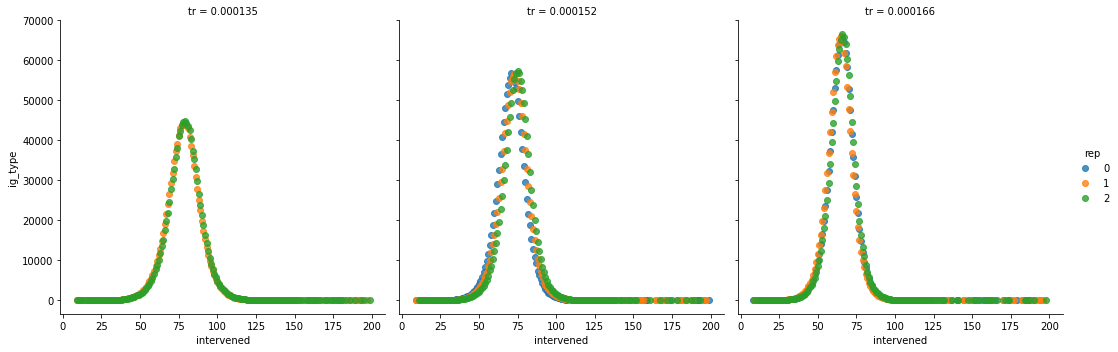

In [39]:
# 把这些操作都放入一条语句中
count_mean = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].\
    count().groupby(level=[0, 1, 2]).mean()

# 结果如图
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr',
        fit_reg=False, data=count_mean.reset_index())
plt.show()

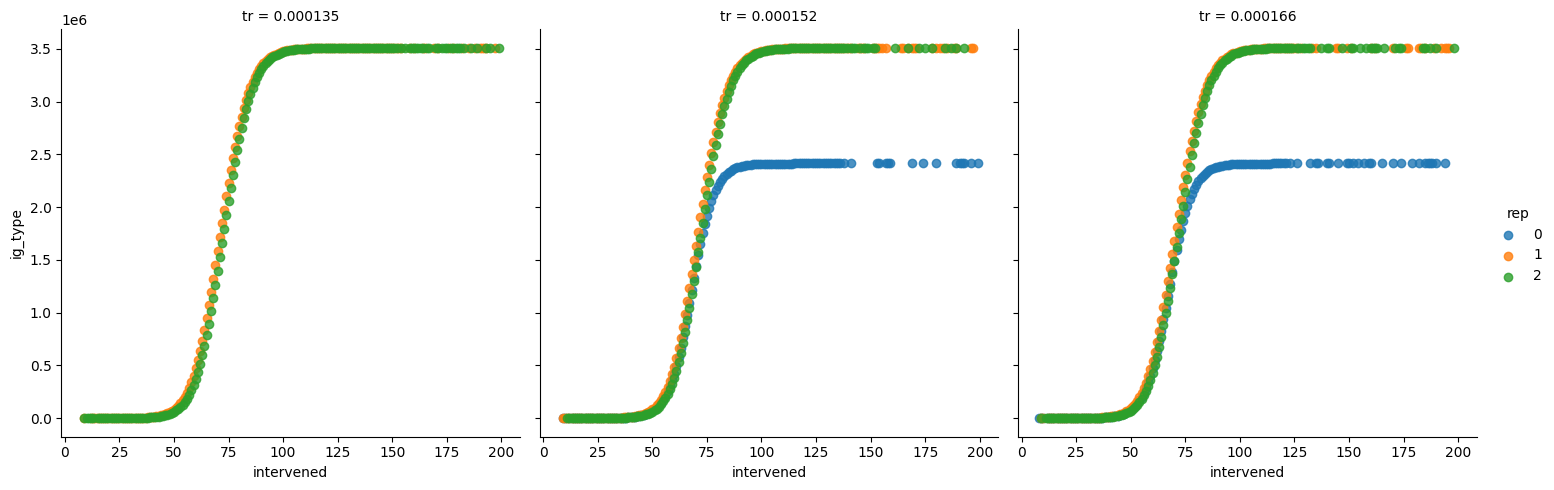

In [41]:
# 把这些操作都放入一条语句中
cumulative_count = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].\
    count().groupby(level=['rep']).cumsum().reset_index()

# 结果如图
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr',
        fit_reg=False, data=cumulative_count.reset_index())
plt.show()